# PHASED ARRAY

### SETUP

In [3]:
from numpy import abs, arange, argmax, array, cos, dot, exp, linspace, pi, sin
from numpy import sqrt, fromfunction, vectorize, where
from numpy import  ones, outer, zeros
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Generate data

In [4]:
from numpy import linspace, pi, sin, sqrt, fromfunction, vectorize, where
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

f0 = 1/20
wavelength = 1/f0

rows = 500
cols = 400
x0 = cols //2
i00 = x0

assert rows > wavelength*20

delta0 = 1/f0/2
i10 = i00 - 1/f0/2
i20 = i00 + 1/f0/2

def n_sources(y, x, n, delta):
    source = 0
    for idx in range(n):
        incr = sin(2*pi*f0*(sqrt((y)**2+(x-(x0+delta*idx))**2)))
        # print(34, delta, idx, incr)
        source += incr
    return sqrt(source**2)
def multiple_sources(i,j,n_ant,delta_ant):
    """
    Parameters
    ----------
    i: int
        row index
    j: int
        column index
    n: int
        number of antennas
    delta_ant: float
        distance between antennas
    """
    return n_sources(i, j, n=n_ant, delta=delta_ant)

n_antenna_array = 4
ratio = 0.5
field_n = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (rows, cols),n_ant=n_antenna_array,delta_ant=1/f0*ratio)
field_8 = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (rows, cols),n_ant=8,delta_ant=1/f0*ratio)
field_4 = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (rows, cols),n_ant=4,delta_ant=1/f0*ratio)
field_3 = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (rows, cols),n_ant=3,delta_ant=1/f0*ratio)
field_2 = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (rows, cols),n_ant=2,delta_ant=1/f0*ratio)
field_1 = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (rows, cols),n_ant=1,delta_ant=1/f0*ratio)
print(f"fo: {f0}")
print(f"delta0: {delta0}")

fo: 0.05
delta0: 10.0


### Plot inteferences

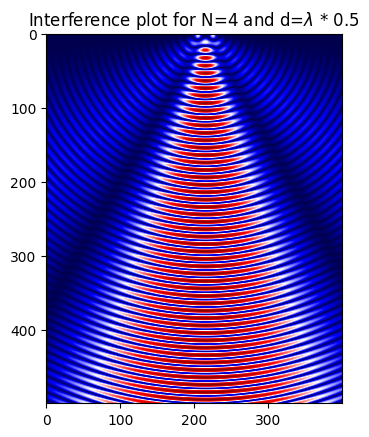

(500, 400) (500, 400) (500, 400)


In [6]:
plt.title(f"Interference plot for N={n_antenna_array} and d=$\\lambda$ * {ratio}")
plt.imshow(field_n, cmap='seismic')
plt.show()
print(field_8.shape, field_2.shape, field_1.shape)

### Plot interferences

#### on Axis orthogonal to antenna axis

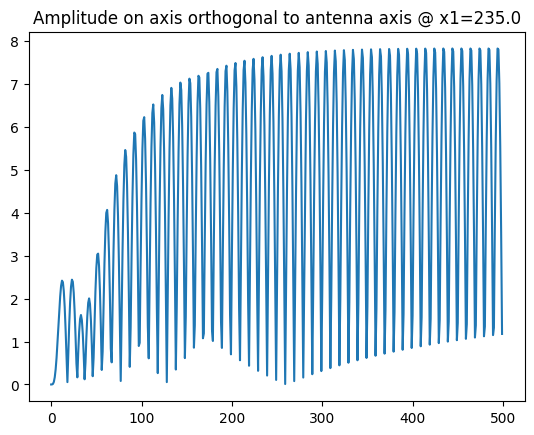

In [7]:
x1 = x0+delta0*3.5
plt.title(f"Amplitude on axis orthogonal to antenna axis @ x1={x1}")
plt.plot(field_8[:,int(x1)])
plt.show()

#### Axis parallel to antennas axis

> For more considerations/modelling on the amplitude on an axis // to antenna axis, refer to Rayleigh-Sommerfeld either via python package [Diffractio](https://diffractio.readthedocs.io/en/latest/index.html) or [Wikipedia page for Fresnel diffraction](https://en.wikipedia.org/wiki/Fresnel_diffraction#The_Fresnel_diffraction_integral)

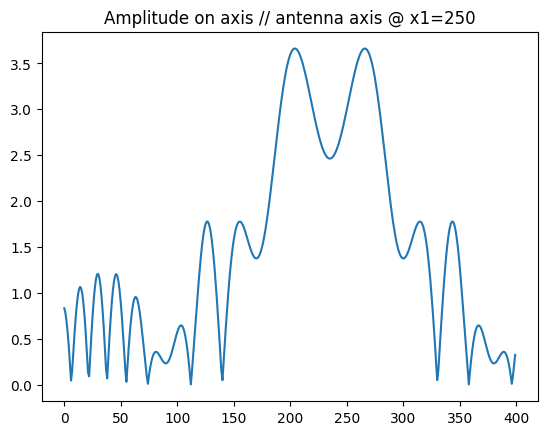

In [8]:
y1 = rows//2
plt.title(f"Amplitude on axis // antenna axis @ x1={y1}")
plt.plot(field_8[y1,:])
plt.show()

#### Constant radius from antennas mid-point

First find radius with max amplitude then plot amplitude at given radius

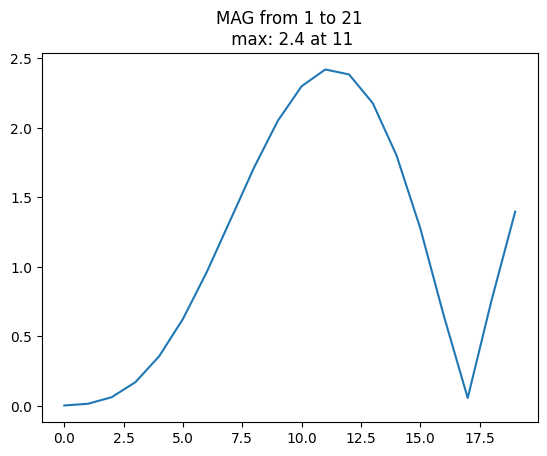

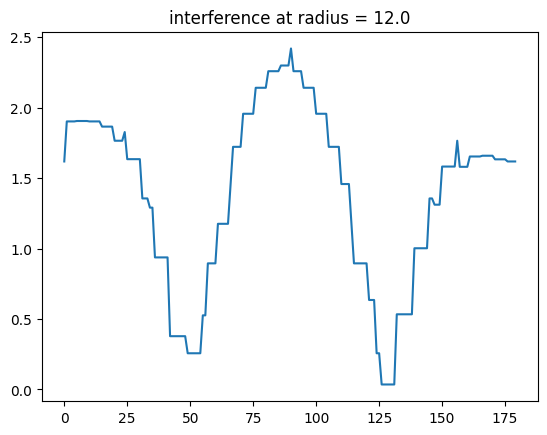

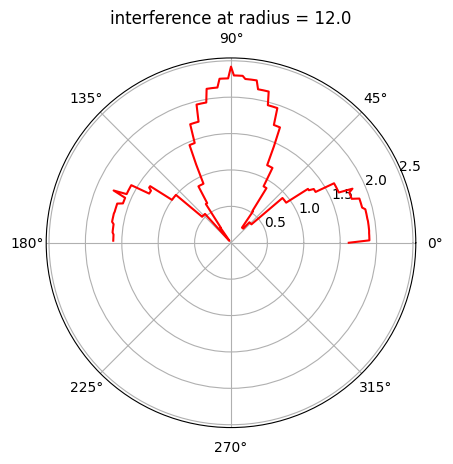

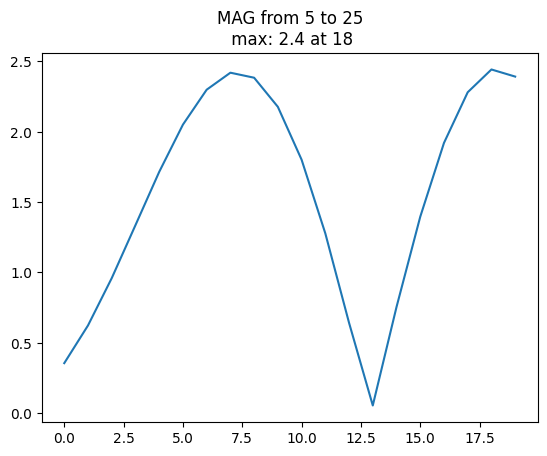

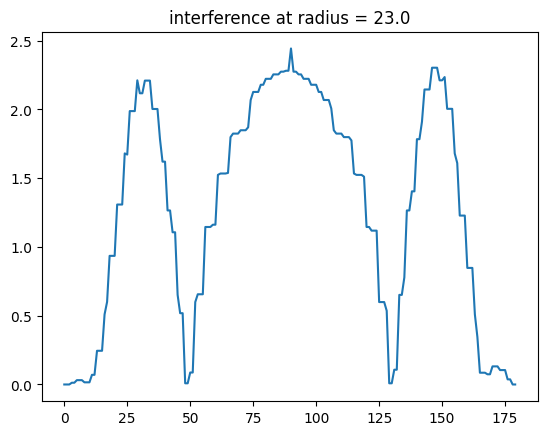

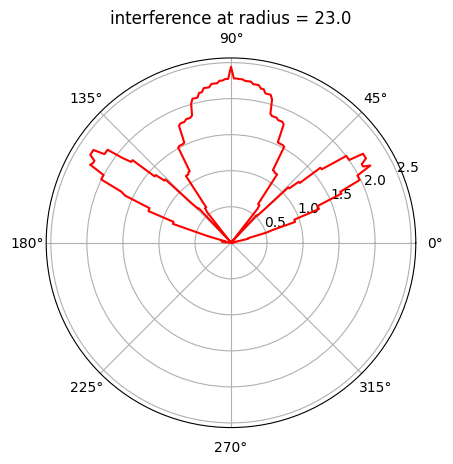

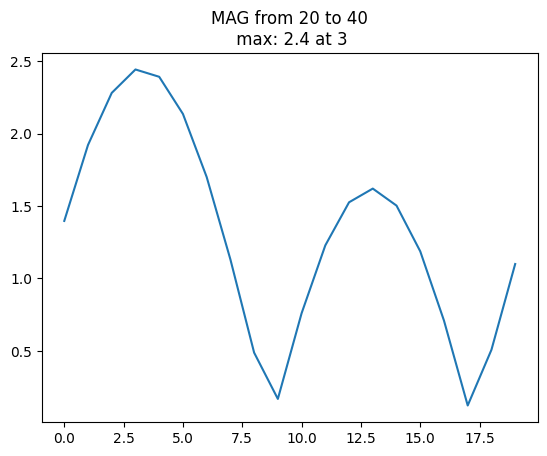

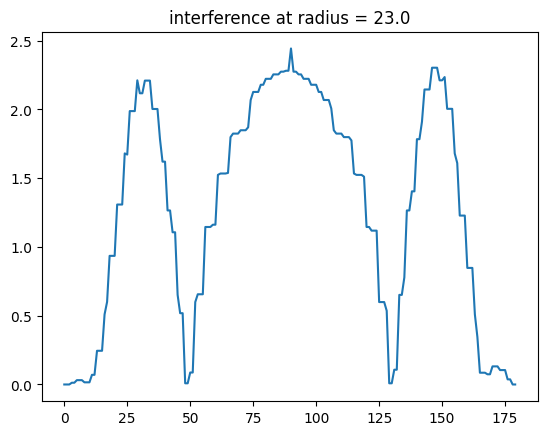

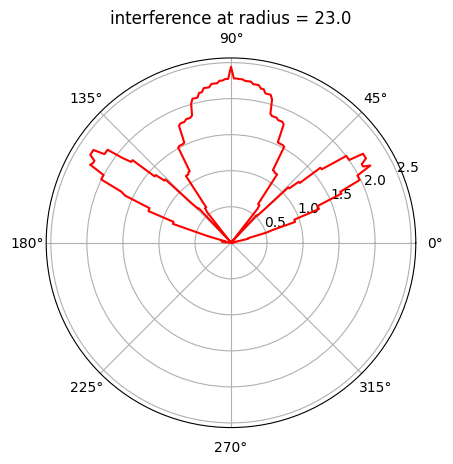

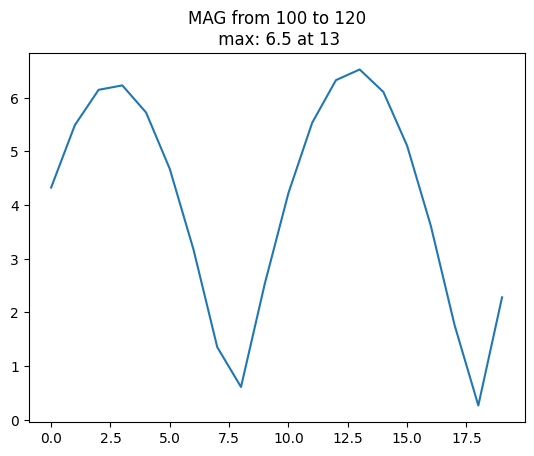

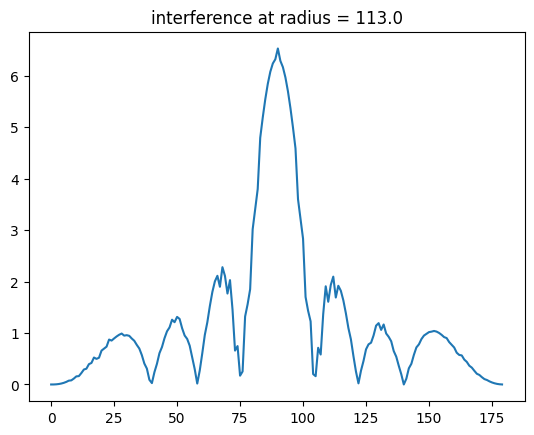

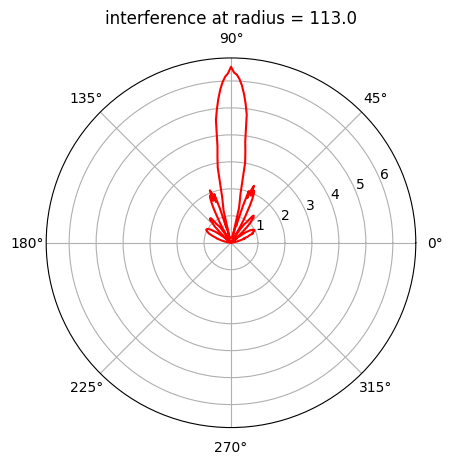

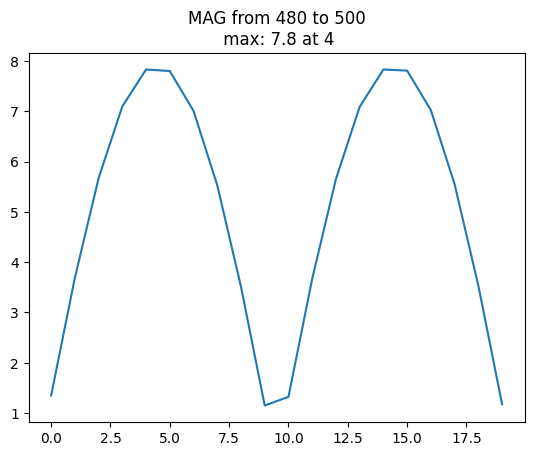

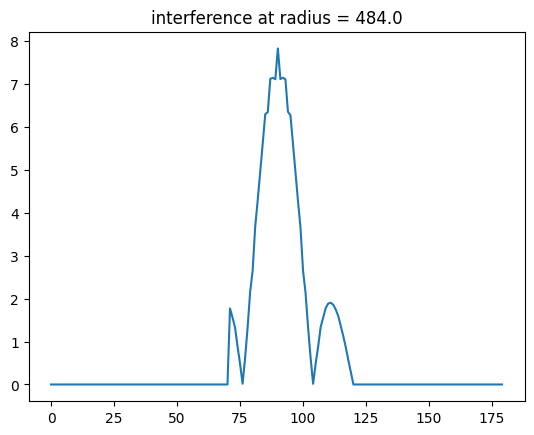

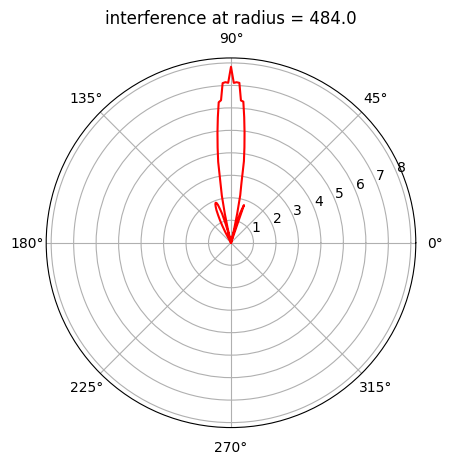

In [9]:
from numpy import cos, sin, arange

def interference_at_r(field, radius, x1):
    mag = []
    for angle in deg_angles:
        x = int(x1+radius*cos(angle*pi/180))
        y = int(radius * sin(angle*pi/180))
        try:
            MAG = field[y,x]
        except IndexError:
            MAG = 0
        if x<0:
            MAG = 0
        mag.append(MAG)
    return mag

fn = 8
if fn==8:
    show_field = field_8
    x1 = x0 + delta0*3.5
elif fn == 4:
    show_field = field_4
    x1 = x0 + delta0*1.5
elif fn == 3:
    show_field = field_3
    x1 = x0 + delta0

deg_angles = arange(0, 180, 1)
deg_rad = arange(0, pi, pi/180)
for y in [1, 5, 20, 100, 480]:
    dy = int(wavelength)
    ys = show_field[y:y+dy,int(x1)]
    max_y, idx = ys.max(), where(ys==ys.max())[0][0]
    plt.title(f"MAG from {y} to {y+dy}\n max: {max_y:.1f} at {idx}")
    plt.plot(ys)
    plt.show()
    radius = sqrt((idx+y)**2)
    mag = interference_at_r(show_field, radius, x1)
    plt.title(f"interference at radius = {radius}")
    plt.plot(deg_angles, mag)
    plt.show()
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    plt.title(f"interference at radius = {radius}")
    ax.plot(deg_rad, mag, 'r')
    plt.show()

### PLOT ANIMATION INTERFERENCES

done generating gif


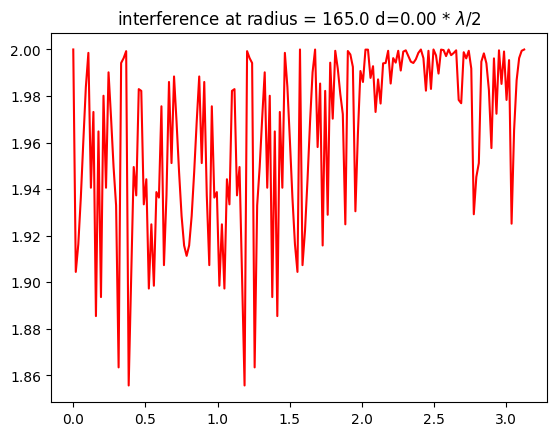

time: 1min 30s (started: 2023-12-31 21:02:46 +00:00)


In [ ]:
from IPython.display import Image
delta0 = 1/f0/2
display_rows = 200
display_cols = 400
x_mid = display_cols//2

# Function to generate an image for a given parameter value
def generate_image(parameter):
    field_n = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (display_rows, display_cols),n_ant=2,delta_ant=parameter)
    return field_n

# Function to update the plot for each frame
def plot_2D(frame):
    plt.clf()  # Clear the previous plot
    field = generate_image(frame*delta0)
    plt.imshow(field, cmap='seismic')
    plt.title(f'inter antenna = {frame:.2f} * 1/f0/2')

def plot_1D(frame):
    plt.clf()  # Clear the previous plot
    show_field = generate_image(frame*delta0)
    min, max = int(display_rows*.8), int(display_rows*.8+delta0*2)
    ys = show_field[min:max,int(x_mid)]
    max_y, idx = ys.max(), where(ys==ys.max())[0][0]
    radius = sqrt((idx+min)**2)
    mag = interference_at_r(show_field, radius, x_mid)
    # fig, ax = plt.subplots() #subplot_kw={'projection': 'polar'})
    plt.title(f"interference at radius = {radius} d={frame:.2f} * $\lambda$/2")
    plt.plot(deg_rad, mag, 'r')

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the range of parameter values


# Create the animation
plot_2D = False
if plot_2D:
    parameter_values = linspace(0, 2, 100)
    animation = FuncAnimation(fig, plot_2D, frames=parameter_values, interval=100)
    fn = "animated_plot_2D.gif"
else:
    parameter_values = linspace(0, 2, 100)
    animation = FuncAnimation(fig, plot_1D, frames=parameter_values, interval=100)
    fn = "animated_plot_1D.gif"

# Save the animation as an animated GIF
animation.save(fn, writer='pillow', fps=5)

print("done generating gif")

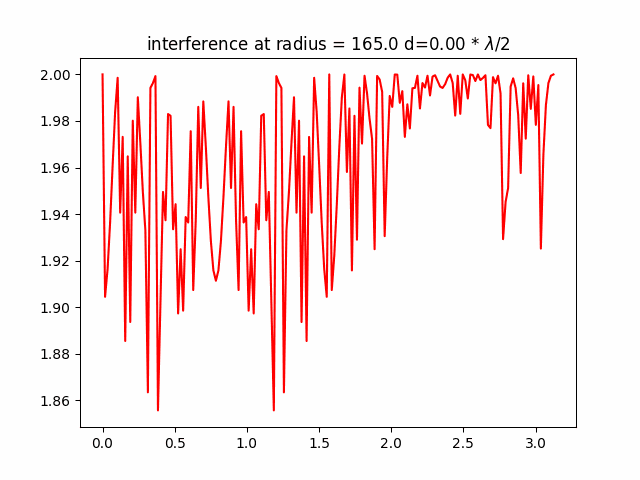

time: 60.1 ms (started: 2023-12-31 21:06:15 +00:00)


In [ ]:
# Show the plot (so animated gif is displayed
Image(open(fn,'rb').read())

#### PLOT interference away from boresight

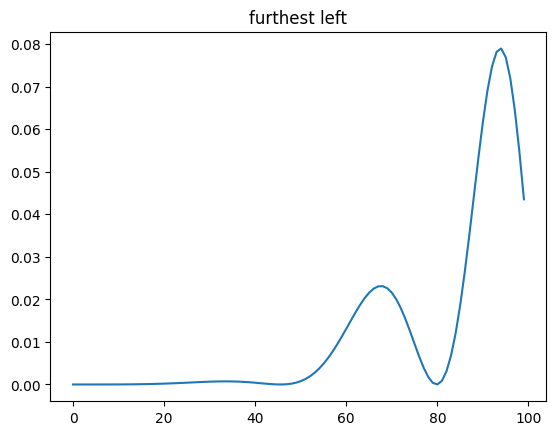

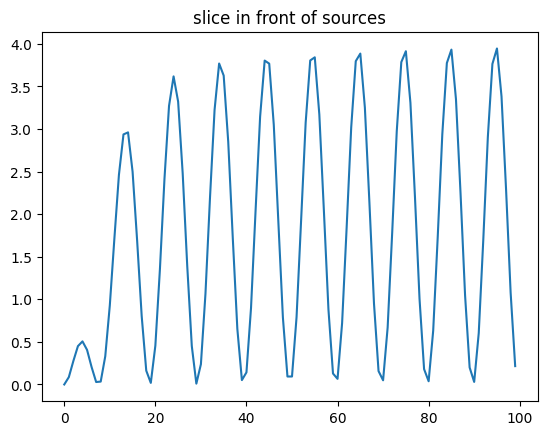

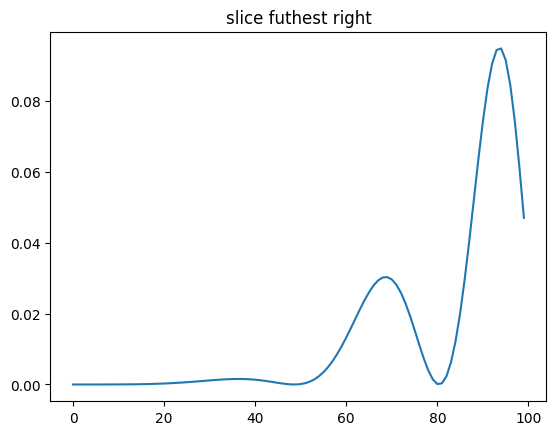

3.932644333789809
(array([5]),)


In [ ]:
#plot furthest left
plt.plot(field_2[:,0])
plt.title("furthest left")
plt.show()
# plot in front of sources
plt.plot(field_2[:,200])
plt.title("slice in front of sources")
plt.show()
# plot furthest right
plt.plot(field_2[:,399])
plt.title("slice futhest right")
plt.show()
print(max(field_2[80:90,200]))
print(where(field_2[80:90,200]==max(field_2[80:90,200])))

# Theoretical study and array computation

At anypoint of space the amplitude is the sum of the wave coming from all the N antennas.
with xi the distance from the point to the ith antenna we have:
$$ A = \Sigma_{i=0}^{N} e^{-j \cdot 2 \cdot \pi \frac{x_i}{\lambda}} $$

where $$ j^2 = -1 $$

Under the far field assumption the wave coming to any point is planar so distance from the respective antennas can be approximated as $$ \delta_i = (i-1) \cdot d \cdot cos(\theta) $$

So

$$  A = e^{-j \cdot \phi} \Sigma_{i=0}^{N} e^{-j \cdot 2 \cdot \pi \frac{(i-1) \cdot d \cdot cos(\theta)}{\lambda}} $$

Recognising a geometric progression it can be simplified 

20.0 600 1200
cols, rows 1200 600
x0, x1 600 605.0
min max 400 420
ys max [0.05888756 1.29166718 2.39804055 3.2697326  3.82143484 3.99915417
 3.78549711 3.20137213 2.3039437  1.18103798 0.05745209 1.29032149
 2.3969148  3.26893426 3.82103845 3.99919443 3.78596585 3.20221956
 2.30508364 1.18235661]


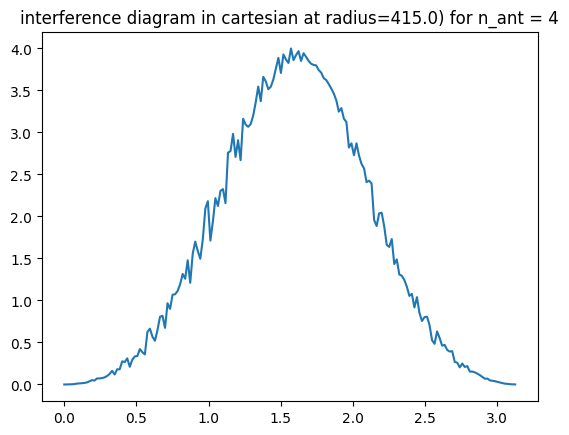

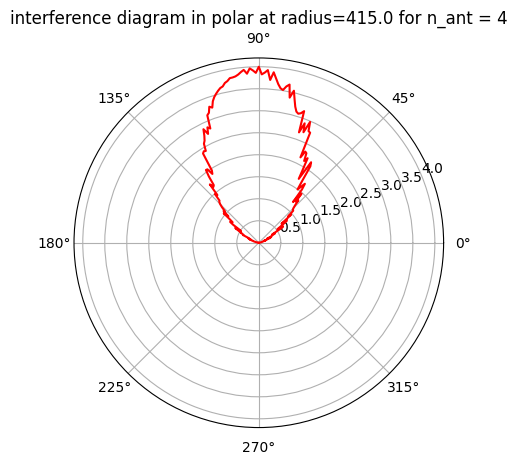

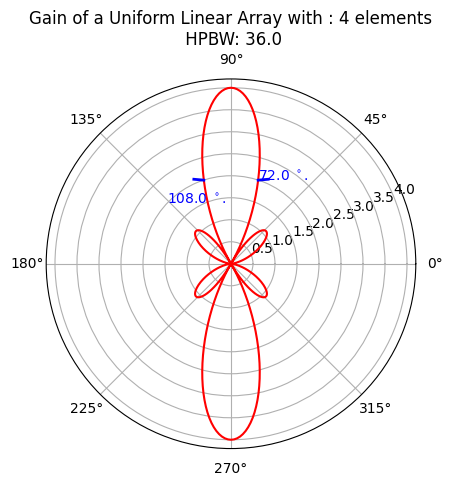

In [12]:
from numpy import abs, arange, argmax, cos, dot, exp, max, min, ones, outer, pi, radians, where
import matplotlib.pyplot as plt

f0 = 1/20
wavelength = 1/f0

delta_d = wavelength / 2
n_antennas = 4
rows_n = int(30*wavelength)
cols_n = 2*rows_n
Ang_points = 360
print(wavelength, rows_n, cols_n)

# Theta values
theta = arange(0, 2 * pi, 2*pi / Ang_points)

## first compute field from above summing of all elements
field_n = fromfunction(vectorize(multiple_sources,excluded=['n_ant','delta_ant']), (rows_n, cols_n),n_ant=n_antennas,delta_ant=0.5*delta_d)
x0 = cols_n//2
x1 = x0 + ( n_antennas-1 )//2 * delta_d
if n_antennas % 2 == 0:
    x1 = x0 +  delta_d*0.5

min_y = int(20*wavelength)
max_y = int(min_y+delta0*2)
print("cols, rows", cols_n, rows_n)
print("x0, x1", x0, x1)
print("min max", min_y, max_y)
ys = field_n[min_y:max_y,int(x1)]
print("ys max", ys)
max_y, idx = ys.max(), where(ys==ys.max())[0][0]
radius = sqrt((idx+min_y)**2)
mag = interference_at_r(field_n, radius, x1)

angles = arange(0, pi, pi / 180)

plt.plot(angles, mag)
plt.title(f"interference diagram in cartesian at radius={radius}) for n_ant = {n_antennas}")
plt.show()

fig, bx = plt.subplots(subplot_kw={'projection': 'polar'})
plt.title(f"interference diagram in polar at radius={radius} for n_ant = {n_antennas}")
bx.plot(angles, mag, 'r')
plt.show()

""" NOW COMPUTE THEORETICAL Array Factor Plot """
# Array indices
n = arange(0, n_antennas).T
# Array weights
w = ones(n_antennas)

# Matrix A
# Matrix A is N x Ang_points
A = outer(n, (1j * 2 * pi * delta_d * cos(theta) / wavelength))

# Matrix X
""" X = [[ exp(-2pi 1j cos(0)), exp(-2pi i cost(2pi * 1/Ang_points)) ... exp(-2pi i cos(2pi * Ang_points/Ang_points))]
            ...
         [  exp(-2pi 1j x n_antennas * cos(0) ... exp(-2pi 1j cos(2pi)) )]]
"""
X = exp(-A)

# Array response
# r = w * X
r = dot(w, X)

# Plotting
gains = abs(r)
G_Max = max(gains)
HPBWs = [abs(gains[idx]-G_Max/2) for idx in range(Ang_points)]
idx0 = where(HPBWs[0:Ang_points//4] == min(HPBWs[0:Ang_points//4]))[0]
idx1 = where(HPBWs[Ang_points//4:Ang_points//2] == min(HPBWs[Ang_points//4:Ang_points//2]))[0]
idx1+=Ang_points//4
theta0 = theta[idx0][0]
theta1 = theta[idx1][0]
HPBW = theta1 - theta0

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, gains, 'r')

cross_length = 2  # Adjust the length of the cross arms
ax.plot([theta0, theta0-0.1], [gains[idx0], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length, label='Cross')
ax.plot([theta1, theta1+0.1], [gains[idx1], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length)

ax.text(theta[idx0][0], gains[idx0], f'{theta0*180/pi:.1f} $^\\circ$.', color='blue')
ax.text(theta[idx1][0]+0.5, gains[idx1], f'{theta1*180/pi:.1f} $^\\circ$.', color='blue')

plt.title(f'Gain of a Uniform Linear Array with : {n_antennas} elements\n HPBW: {abs(HPBW*180/pi):.1f}')
plt.show()

# Specific examples



## BPM

### 2 Antennas - Hadamard code length 2

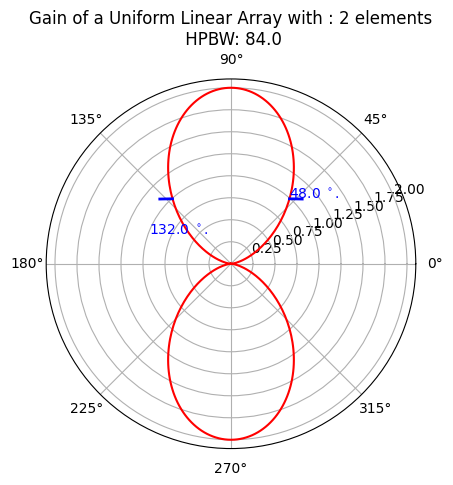

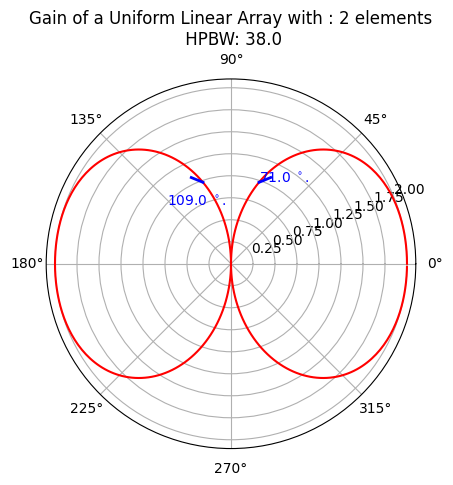

In [ ]:
from numpy import abs, arange, argmax, array, cos, dot, exp, ones, outer, pi, radians, where
import matplotlib.pyplot as plt


# Constants
f = 62e9
c = 3e8
lambda_0 = c / f
d = lambda_0 / 2
n_antennas = 2
Ang_points = 360

# Theta values
theta = arange(0, 2 * pi, 2*pi / Ang_points)

# Array indices
n = arange(0, n_antennas).T
# Array weights
w = array([1, -1])

A = outer(n, (1j * 2 * pi * d * cos(theta) / lambda_0))
X = exp(-A)

# Array response
# r = w * X
for w in [array([1, 1]), array([1, -1])]:
    r = dot(w, X)

    # Plotting
    gains = abs(r)
    G_Max = max(gains)
    HPBWs = [abs(gains[idx]-G_Max/2) for idx in range(Ang_points)]
    idx0 = where(HPBWs[0:Ang_points//4] == min(HPBWs[0:Ang_points//4]))[0]
    idx1 = where(HPBWs[Ang_points//4:Ang_points//2] == min(HPBWs[Ang_points//4:Ang_points//2]))[0]
    idx1+=Ang_points//4
    theta0 = theta[idx0][0]
    theta1 = theta[idx1][0]
    HPBW = theta1 - theta0

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, gains, 'r')

    cross_length = 2  # Adjust the length of the cross arms
    ax.plot([theta0, theta0-0.1], [gains[idx0], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length, label='Cross')
    ax.plot([theta1, theta1+0.1], [gains[idx1], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length)

    ax.text(theta[idx0][0], gains[idx0], f'{theta0*180/pi:.1f} $^\circ$.', color='blue')
    ax.text(theta[idx1][0]+0.5, gains[idx1], f'{theta1*180/pi:.1f} $^\circ$.', color='blue')

    plt.title(f'Gain of a Uniform Linear Array with : {n_antennas} elements\n HPBW: {abs(HPBW*180/pi):.1f}')
    plt.show()

### 4 Antennas - Hadamard code length 4

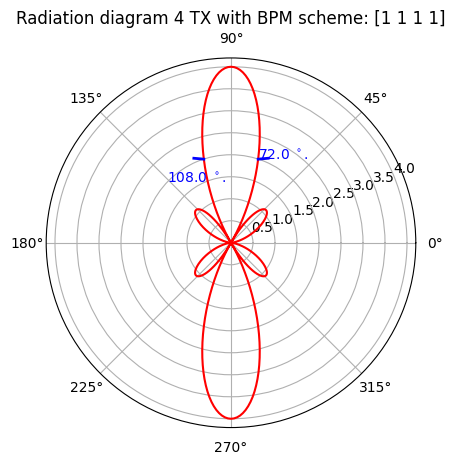

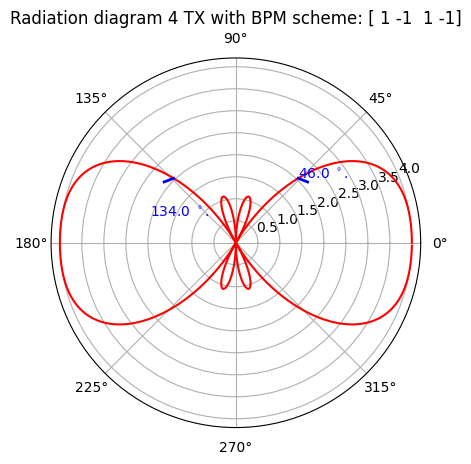

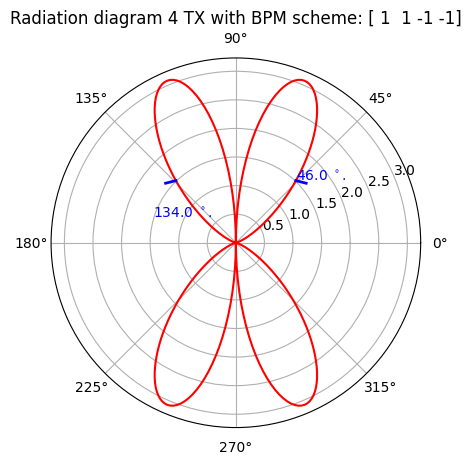

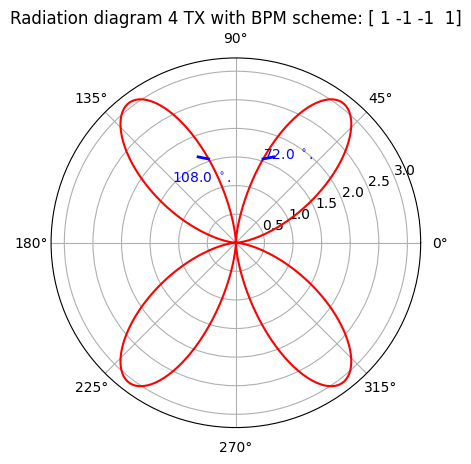

In [ ]:
from numpy import abs, arange, argmax, array, cos, dot, exp, ones, outer, pi, radians, where
import matplotlib.pyplot as plt
# loosly inspired from https://www.raymaps.com/index.php/fundamentals-of-a-uniform-linear-array-ula/


# Constants
f = 62e9
c = 3e8
lambda_0 = c / f
d = lambda_0 / 2
n_antennas = 4
Ang_points = 360

# Theta values
theta = arange(0, 2 * pi, 2*pi / Ang_points)

# Array indices
n = arange(0, n_antennas).T
A = outer(n, (1j * 2 * pi * d * cos(theta) / lambda_0))
X = exp(-A)

# Array response

for w in [array([1, 1, 1, 1]),
          array([1, -1, 1, -1]),
          array([1, 1, -1, -1]),
          array([1, -1, -1, 1])]:
    # r = w * X
    r = dot(w, X)

    # Plotting
    gains = abs(r)
    G_Max = max(gains)
    HPBWs = [abs(gains[idx]-G_Max/2) for idx in range(Ang_points)]
    idx0 = where(HPBWs[0:Ang_points//4] == min(HPBWs[0:Ang_points//4]))[0]
    idx1 = where(HPBWs[Ang_points//4:Ang_points//2] == min(HPBWs[Ang_points//4:Ang_points//2]))[0]
    idx1+=Ang_points//4
    theta0 = theta[idx0][0]
    theta1 = theta[idx1][0]
    HPBW = theta1 - theta0

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, gains, 'r')

    cross_length = 2  # Adjust the length of the cross arms
    ax.plot([theta0, theta0-0.1], [gains[idx0], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length, label='Cross')
    ax.plot([theta1, theta1+0.1], [gains[idx1], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length)

    ax.text(theta[idx0][0], gains[idx0], f'{theta0*180/pi:.1f} $^\circ$.', color='blue')
    ax.text(theta[idx1][0]+0.5, gains[idx1], f'{theta1*180/pi:.1f} $^\circ$.', color='blue')

    # plt.title(f'Gain of a Uniform Linear Array with : {n_antennas} elements\n HPBW: {abs(HPBW*180/pi):.1f}')
    plt.title(f'Radiation diagram 4 TX with BPM scheme: {w}')
    plt.show()

### 4 Antennas - 2 phasers

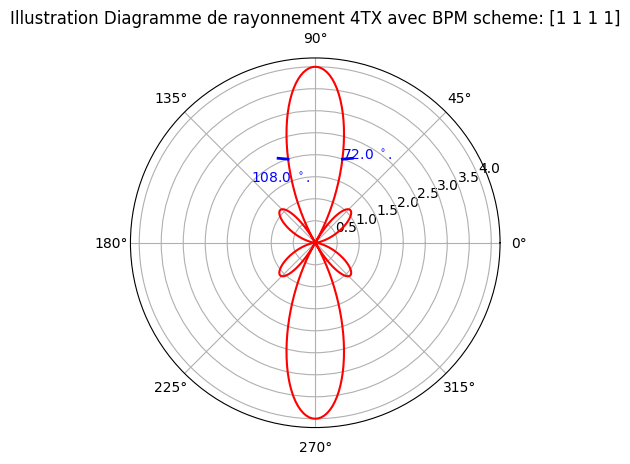

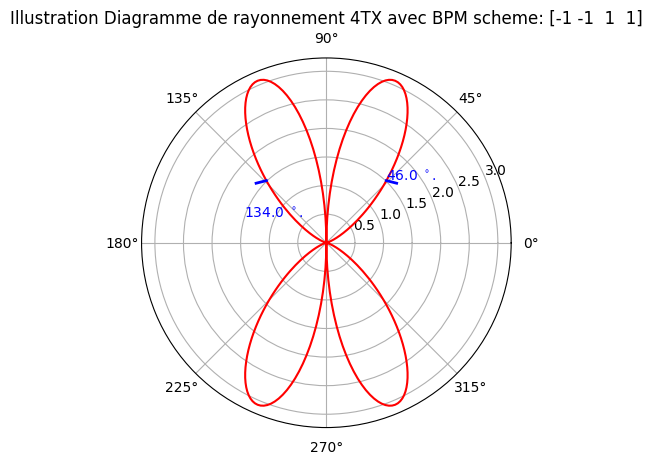

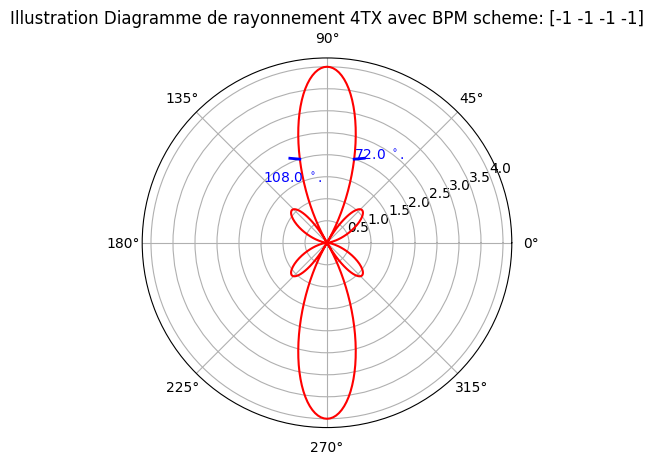

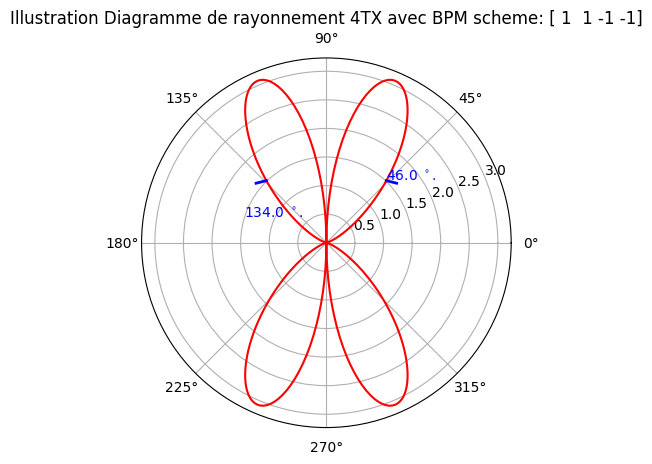

In [ ]:
from numpy import abs, arange, argmax, array, cos, dot, exp, ones, outer, pi, radians, where
import matplotlib.pyplot as plt
# loosly inspired from https://www.raymaps.com/index.php/fundamentals-of-a-uniform-linear-array-ula/


# Constants
f = 62e9
c = 3e8
lambda_0 = c / f
d = lambda_0 / 2
n_antennas = 4
Ang_points = 360

# Theta values
theta = arange(0, 2 * pi, 2*pi / Ang_points)

# Array indices
n = arange(0, n_antennas).T
A = outer(n, (1j * 2 * pi * d * cos(theta) / lambda_0))
X = exp(-A)

# Array response
w1s = [array([1, 1, 1, 1]),
          array([-1, -1, 1, 1]),
          array([-1,- 1, -1, -1]),
          array([1, 1, -1, -1])]

w2s =     [array([1, 1, 1, 1]),
          array([1, -1, -1, 1]),
          array([-1,1, 1, -1]),
          array([-1,- 1, -1, -1])]

for w in w1s:
    # r = w * X
    r = dot(w, X)

    # Plotting
    gains = abs(r)
    G_Max = max(gains)
    HPBWs = [abs(gains[idx]-G_Max/2) for idx in range(Ang_points)]
    idx0 = where(HPBWs[0:Ang_points//4] == min(HPBWs[0:Ang_points//4]))[0]
    idx1 = where(HPBWs[Ang_points//4:Ang_points//2] == min(HPBWs[Ang_points//4:Ang_points//2]))[0]
    idx1+=Ang_points//4
    theta0 = theta[idx0][0]
    theta1 = theta[idx1][0]
    HPBW = theta1 - theta0

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, gains, 'r')

    cross_length = 2  # Adjust the length of the cross arms
    ax.plot([theta0, theta0-0.1], [gains[idx0], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length, label='Cross')
    ax.plot([theta1, theta1+0.1], [gains[idx1], gains[idx0]+0.1], color='b', linestyle='-', linewidth=cross_length)

    ax.text(theta[idx0][0], gains[idx0], f'{theta0*180/pi:.1f} $^\circ$.', color='blue')
    ax.text(theta[idx1][0]+0.5, gains[idx1], f'{theta1*180/pi:.1f} $^\circ$.', color='blue')

    # plt.title(f'Gain of a Uniform Linear Array with : {n_antennas} elements\n HPBW: {abs(HPBW*180/pi):.1f}')
    # plt.title(f'Radiation diagram 4 TX with BPM scheme: {w}')
    plt.title(f'Illustration Diagramme de rayonnement 4TX avec BPM scheme: {w}')
    plt.show()

## Beam Steering

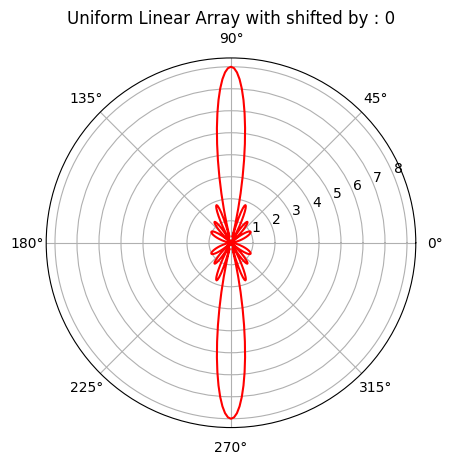

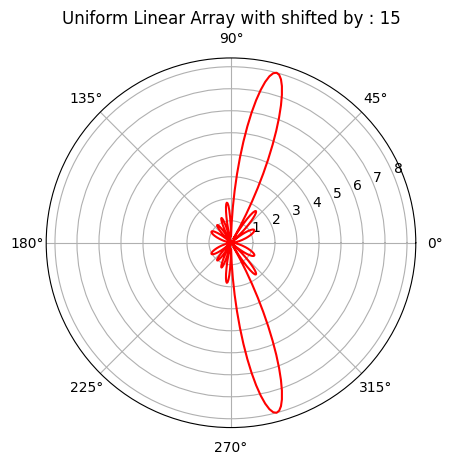

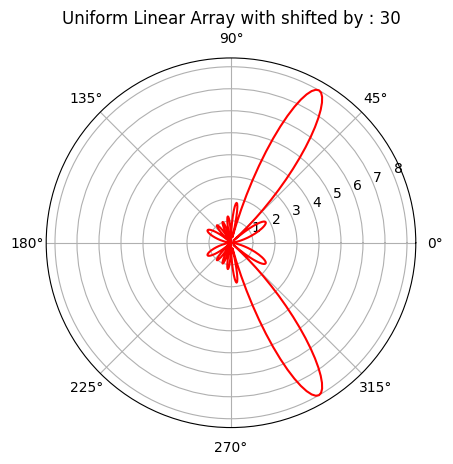

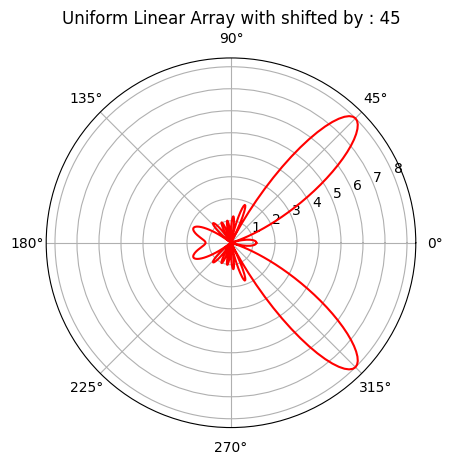

In [ ]:
from numpy import abs, arange, argmax, array, sin, cos, dot, exp, ones, outer, pi, radians, where, zeros
import matplotlib.pyplot as plt

# Constants
f = 62e9
c = 3e8
lambda_0 = c / f
d = lambda_0 / 2
n_antennas = 8
Ang_points = 360

# Theta values
theta = arange(0, 2 * pi, 2*pi / Ang_points)

# Array indices
n = arange(0, n_antennas).T
A = outer(n, (1j * 2 * pi * d * cos(theta) / lambda_0))
X = exp(-A)

# Array response

for psi in [0, 15, 30, 45]:
    # psi is the steering angle in degrees
    psir = psi * pi/180
    # phi is the phase to be added on each of them
    phi = pi * sin(psir)

    delta_phi = linspace(0, phi*(n_antennas-1), n_antennas)
    delta_phi = exp(1j*delta_phi)
    w = delta_phi

    r = dot(w, X)

    # Plotting
    gains = abs(r)
    G_Max = max(gains)
    HPBW = 0

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, gains, 'r')

    plt.title(f'Uniform Linear Array with shifted by : {psi}')
    plt.show()

## Amplitude tapering

[[ 0.66666667 -0.33333333 -0.33333333]
 [-0.33333333  0.66666667 -0.33333333]
 [-0.33333333 -0.33333333  0.66666667]]


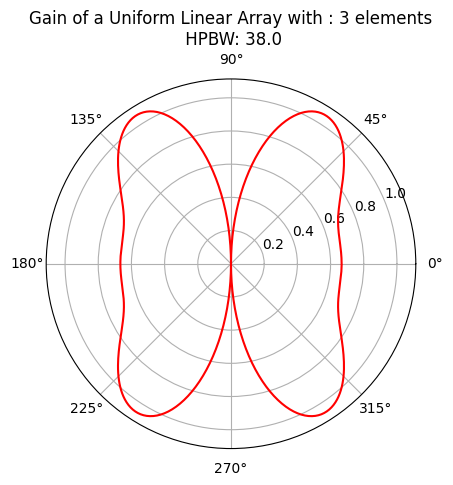

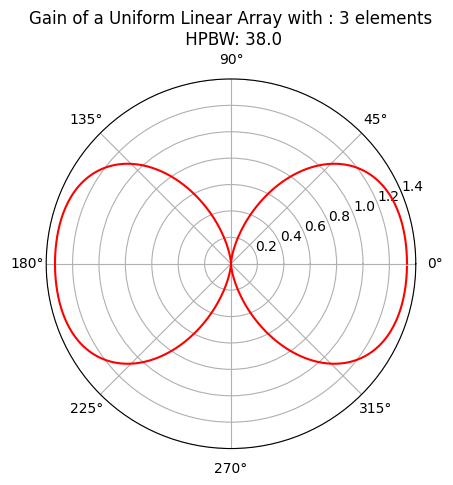

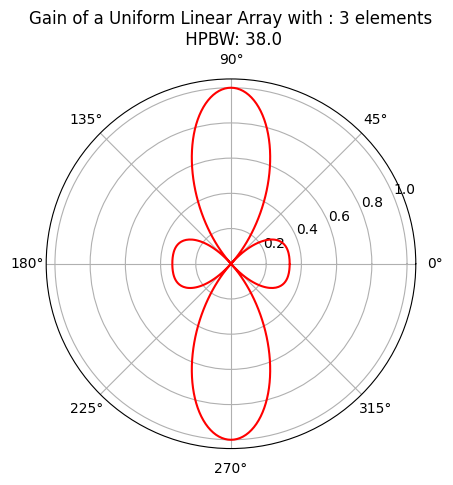

time: 1.04 s (started: 2024-01-12 20:39:23 +00:00)


In [ ]:
n_antennas = 3
Ang_points = 360
f = 62e9
c = 3e8
lambda_0 = c / f
d = lambda_0 / 2

# Theta values
theta = arange(0, 2 * pi, 2*pi / Ang_points)

# Array indices
n = arange(0, n_antennas).T
A = outer(n, (1j * 2 * pi * d * cos(theta) / lambda_0))
X = exp(-A)

ws = [array([ 1/3, 1/3, -2/3]),
      array([ 1/3,-2/3, 1/3]),
      array([ 1/3, 1/3, 1/3])]

ws0 = array([[ sqrt(2)/3, sqrt(2)/3, -2/sqrt(2)/3],
             [ sqrt(2)/3,-2/sqrt(2)/3, sqrt(2)/3],
             [-2/sqrt(2)/3, sqrt(2)/3, sqrt(2)/3]])

ws1 = array([[1, 1],[1, -1]])

ws2 = array([[ 1/3, 1/3, -2/3],
             [ 1/3,-2/3, 1/3],
             [-2/3, 1/3, 1/3]])

print(dot(ws2,ws2.T))

for w in ws:
    r = dot(w, X)
    # Plotting
    gains = abs(r)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, gains, 'r')
    plt.title(f'Gain of a Uniform Linear Array with : {n_antennas} elements\n HPBW: {abs(HPBW*180/pi):.1f}')
    plt.show()